In [118]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt

ratings = pd.read_csv(f'../data_loading/mindreader/ratings.csv')

uri_ratings = ratings[['uri', 'userId']].groupby('uri').count()
uri_ratings.columns = ['ratings']

real_ratings = ratings[ratings.sentiment != 0][['uri', 'userId']].groupby('uri').count()
real_ratings.columns = ['ratings']

entities = pd.read_csv(f'../data_loading/mindreader/entities.csv')
entities.labels = entities.labels.str.split('|')
entities['all_ratings'] = entities.uri.isin(uri_ratings.index)
entities['real_ratings'] = entities.uri.isin(real_ratings.index)

1.0
1.0
1.0
1.0
1.0
{'Decade': {'frac_uncovered': 0.0, 'frac_all': 0.0, 'frac_real': 1.0, 'entities': 10}, 'Category': {'frac_uncovered': 0.22033898305084745, 'frac_all': 0.07796610169491526, 'frac_real': 0.7016949152542373, 'entities': 295}, 'Movie': {'frac_uncovered': 0.03178137651821862, 'frac_all': 0.3451417004048583, 'frac_real': 0.6230769230769231, 'entities': 4940}, 'Company': {'frac_uncovered': 0.3154639175257732, 'frac_all': 0.29690721649484536, 'frac_real': 0.38762886597938145, 'entities': 485}, 'Person': {'frac_uncovered': 0.6409801957309085, 'frac_all': 0.23110117900901594, 'frac_real': 0.12791862526007552, 'entities': 12977}}


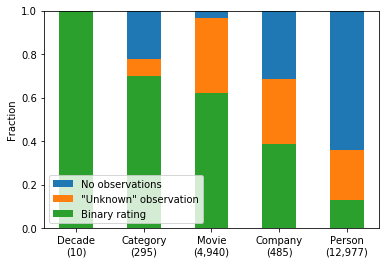

In [121]:
def has_label(label):
    return entities[entities.labels.apply(lambda item: label in item)]

groups =['Decade', 'Category', 'Movie', 'Company', 'Person']
group_statistics = dict()

for group in groups:
    df = has_label(group)
    
    num_e = len(df)
    num_a = len(df[df.all_ratings & ~df.real_ratings])
    num_u = len(df[~df.all_ratings & ~df.real_ratings])
    num_r = len(df[df.real_ratings])
    
    frac_u = num_u / num_e
    frac_a = num_a / num_e
    frac_r = num_r / num_e
    
    group_statistics[group] = {
        'frac_uncovered': frac_u,
        'frac_all': frac_a,
        'frac_real': frac_r,
        'entities': num_e
    }
    
    print(frac_u + frac_a + frac_r)
    
# Get entities
num_entities = [group_statistics[group]['frac_uncovered'] for group in groups]
num_rated_all = [group_statistics[group]['frac_all'] for group in groups]
num_rated_real = [group_statistics[group]['frac_real'] for group in groups]

num_entities = np.array(num_entities)
num_rated_all = np.array(num_rated_all)
num_rated_real = np.array(num_rated_real)

groups = [f'{group}\n({group_statistics[group]["entities"]:,})' for group in groups]
w = 0.35
plt.bar(groups, num_entities, width=0.5, bottom=num_rated_all + num_rated_real)
plt.bar(groups, num_rated_all, width=0.5, bottom=num_rated_real)
plt.bar(groups, num_rated_real, width=0.5)

plt.legend(['No observations', '"Unknown" observation', 'Binary rating'], loc='best')
plt.ylabel('Fraction')
#plt.title('Coverage of entity types')
plt.savefig('coverage.pdf', bbox_inches='tight')
plt.show()
print(group_statistics)